
# <div align=center> Segmentez des clients d'un site e-commerce </div>

### Structure des données :

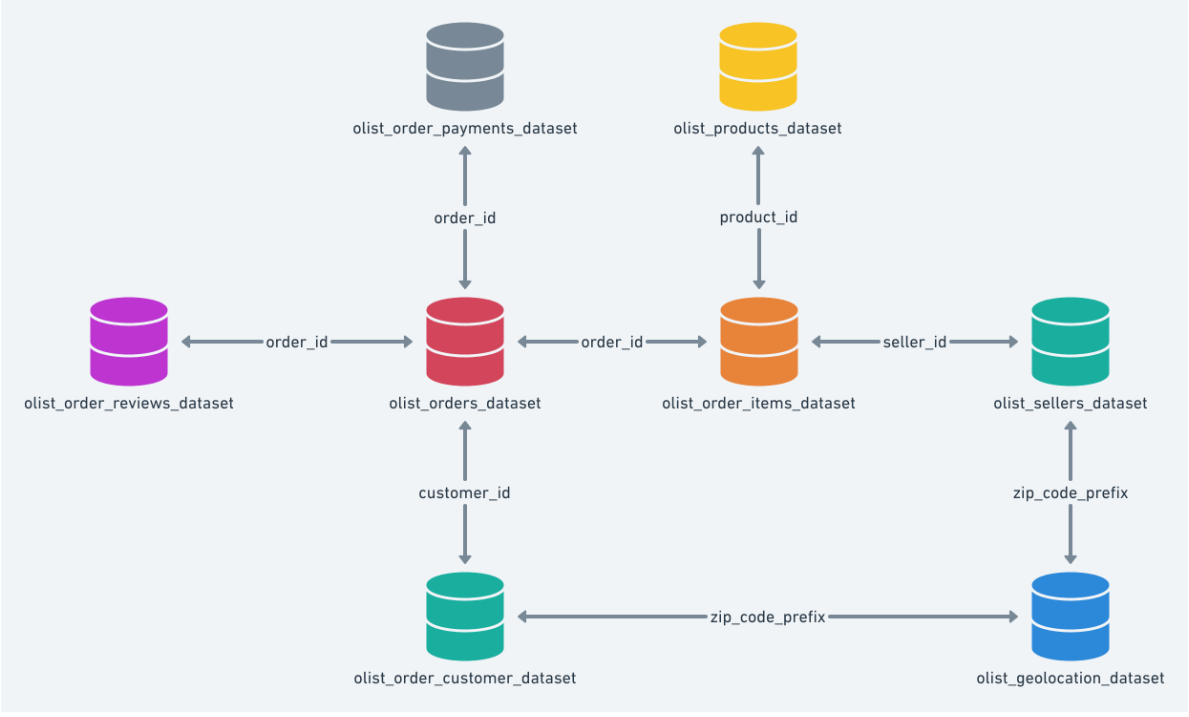

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from data_analysis_library import *

pd.set_option("display.max_columns", 40)
pd.set_option("display.max_row", 71)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df_customers = pd.read_csv("archive/olist_customers_dataset.csv", sep=",")
df_geoloc = pd.read_csv("archive/olist_geolocation_dataset.csv", sep=",")
df_orders = pd.read_csv("archive/olist_orders_dataset.csv", sep=",")
df_order_items = pd.read_csv("archive/olist_order_items_dataset.csv", sep=",")
df_order_payments = pd.read_csv("archive/olist_order_payments_dataset.csv", sep=",")
df_reviews = pd.read_csv("archive/olist_order_reviews_dataset.csv", sep=",")
df_products = pd.read_csv("archive/olist_products_dataset.csv", sep=",")
df_sellers = pd.read_csv("archive/olist_sellers_dataset.csv", sep=",")
df_category = pd.read_csv("archive/product_category_name_translation.csv", sep=",")

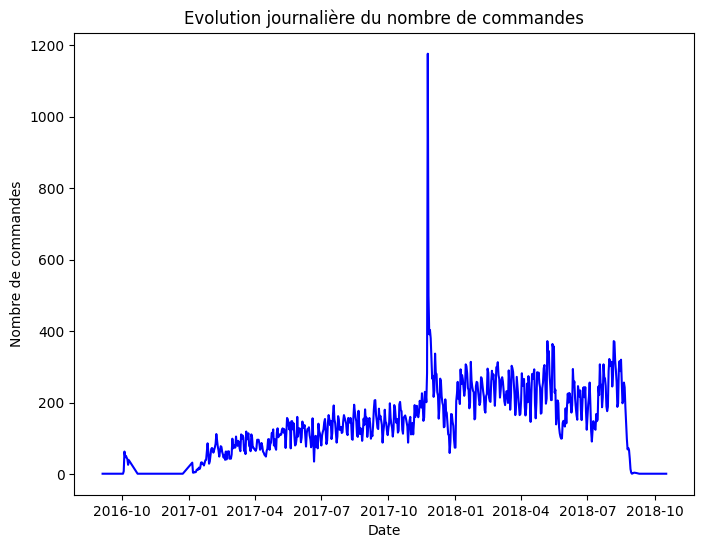

In [3]:
df = df_orders.copy()
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(
    df["order_delivered_customer_date"]
)
df["jour_entre_commande_et_livraison"] = (
    df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
).dt.days
df["jour_de_la_semaine"] = df["order_purchase_timestamp"].dt.day_name()
df["mois"] = df["order_purchase_timestamp"].dt.month
df["jour"] = df["order_purchase_timestamp"].dt.day_name()
df["heure"] = df["order_purchase_timestamp"].dt.hour
commandes_par_jour = df.groupby(df["order_purchase_timestamp"].dt.date)[
    "order_id"
].count()
plt.figure(figsize=(8, 6))
plt.plot(commandes_par_jour.index, commandes_par_jour.values, color="blue")
plt.title("Evolution journalière du nombre de commandes")
plt.xlabel("Date")
plt.ylabel("Nombre de commandes")
plt.show()

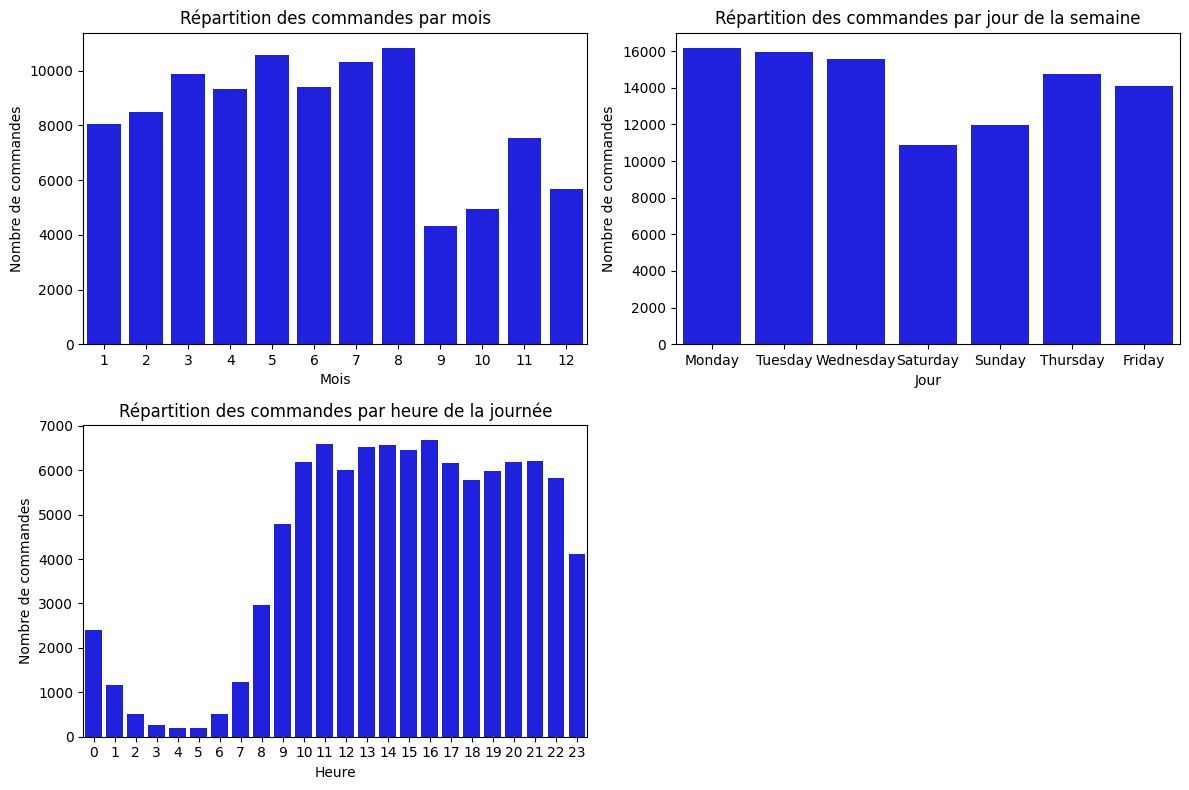

In [4]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.countplot(x="mois", data=df, color="blue")
plt.title("Répartition des commandes par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")

plt.subplot(2, 2, 2)
sns.countplot(x="jour", data=df, color="blue")
plt.title("Répartition des commandes par jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Nombre de commandes")

plt.subplot(2, 2, 3)
sns.countplot(x="heure", data=df, color="blue")
plt.title("Répartition des commandes par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Nombre de commandes")

plt.tight_layout()
plt.show()

In [5]:
def plot_pie_threshold(df, col, min_perc=False):
    df = df.reset_index()
    # définir le pourcentage minimum d'occurrences pour les valeurs à garder
    if min_perc:
        min_percentage = min_perc
        # calculer la fréquence des valeurs de la colonne Customer_segment
        segment_counts = df[col].value_counts(normalize=True) * 100
        # identifier les segments à remplacer par "Others"
        segments_to_replace = segment_counts[segment_counts < min_percentage].index
        # remplacer les segments par "Others"
        df[col] = df[col].replace(segments_to_replace, "others")
        #         colors = sns.color_palette("ch:start=.2,rot=-.3", n_colors=df[col].nunique())
        colors = sns.color_palette("coolwarm", n_colors=df[col].nunique())
        plt.pie(
            df[col].value_counts(),
            labels=df[col].value_counts().index,
            autopct="%.0f%%",
            colors=colors,
        )
        plt.title(f"Distribution des clients selon {col}")
        plt.legend(bbox_to_anchor=[1.8, 0.5], loc="right", ncol=1)
        plt.show()
    else:
        colors = sns.color_palette("coolwarm", n_colors=df[col].nunique())
        #         colors = sns.color_palette("ch:start=.2,rot=-.3", n_colors=df[col].nunique())
        plt.pie(
            df[col].value_counts(),
            labels=df[col].value_counts().index,
            autopct="%.0f%%",
            colors=colors,
        )
        plt.title(f"Distribution des clients selon {col}")
        plt.legend(bbox_to_anchor=[1.8, 0.5], loc="right", ncol=1)
        plt.show()

In [6]:
dict_categories = {
    "SP": "São Paulo",
    "RJ": "Rio de Janeiro",
    "MG": "Minas Gerais",
    "RS": "Rio Grande do Sul",
    "PR": "Paraná",
    "SC": "Santa Catarina",
    "BA": "Bahia",
    "DF": "Distrito Federal",
    "ES": "Espírito Santo",
    "GO": "Goiás",
    "PE": "Pernambuco",
    "CE": "Ceará",
    "PA": "Pará",
    "MT": "Mato Grosso",
    "MA": "Maranhão",
    "MS": "Mato Grosso do Sul",
    "PB": "Paraíba",
    "PI": "Piauí",
    "RN": "Rio Grande do Norte",
    "AL": "Alagoas",
    "SE": "Sergipe",
    "TO": "Tocantins",
    "RO": "Rondônia",
    "AM": "Amazonas",
    "AC": "Acre",
    "AP": "Amapá",
    "RR": "Roraima",
}
df_customers["customer_state"] = df_customers["customer_state"].map(dict_categories)

In [63]:
display(df_geoloc.head(2))
print(df_geoloc.info())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,São Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,São Paulo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


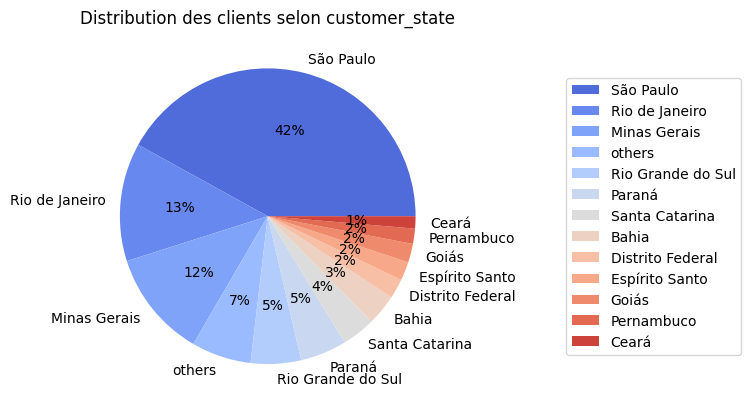

In [7]:
display(df_customers.head(2))
print(df_customers.info())
plot_pie_threshold(df_customers, "customer_state", 1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


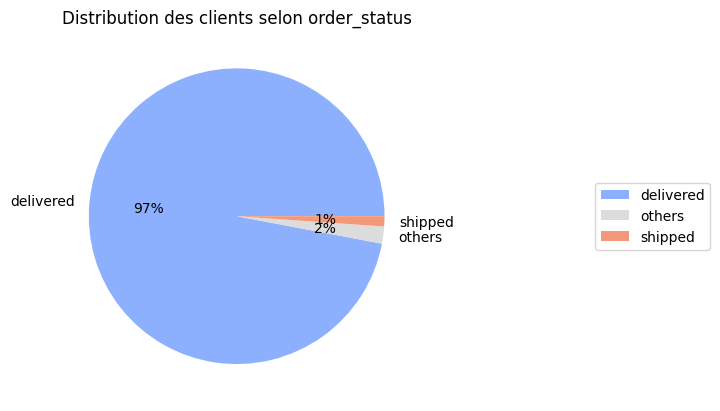

In [8]:
display(df_orders.head(2))
print(df_orders.info())
plot_pie_threshold(df_orders, "order_status", 1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


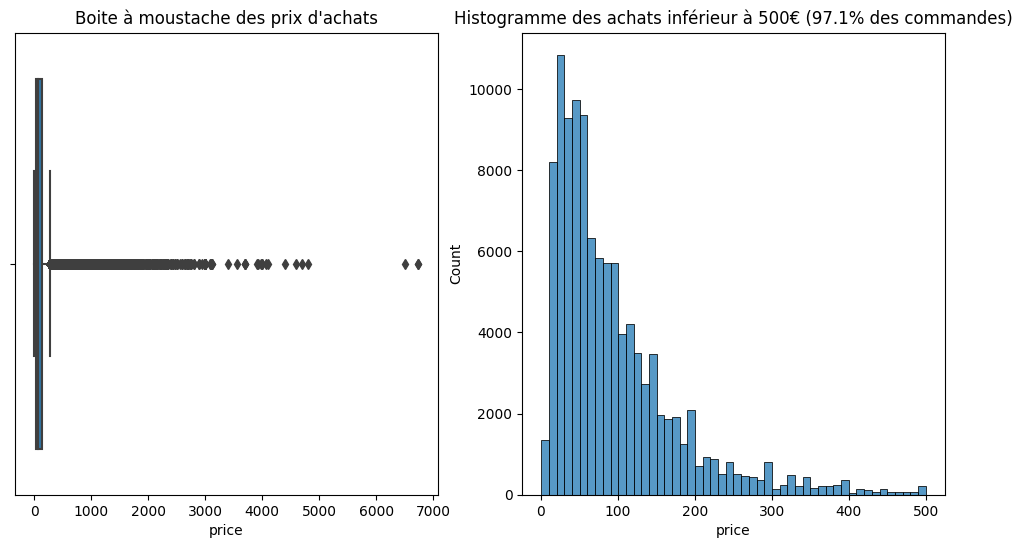

In [9]:
display(df_order_items.head(2))
print(df_order_items.info())
df_order_subsample = df_order_items.loc[df_order_items["price"] < 500, :]
perc_subsample = df_order_subsample.shape[0] / df_order_items.shape[0]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df_order_items, x="price")
plt.title("Boite à moustache des prix d'achats")
plt.subplot(1, 2, 2)
sns.histplot(df_order_subsample, x="price", bins=50)
plt.title(
    f"Histogramme des achats inférieur à 500€ ({np.round(perc_subsample, 3)*100}% des commandes)"
)
plt.show()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


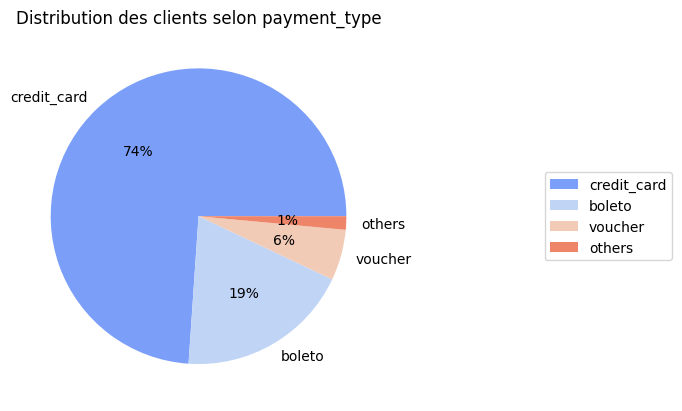

<Axes: xlabel='payment_value', ylabel='Count'>

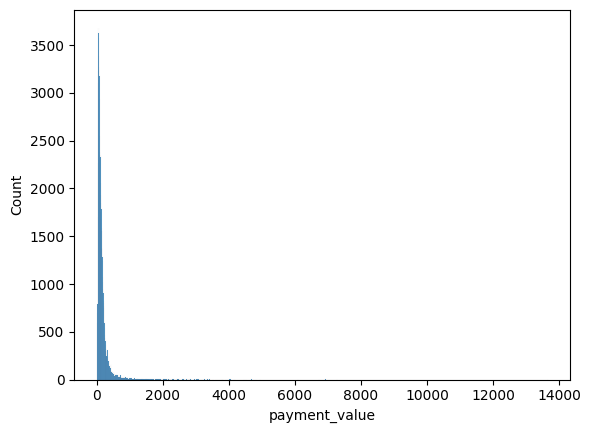

In [10]:
display(df_order_payments.head(2))
print(df_order_payments.info())
plot_pie_threshold(df_order_payments, "payment_type", 2)
sns.histplot(df_order_payments, x="payment_value")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


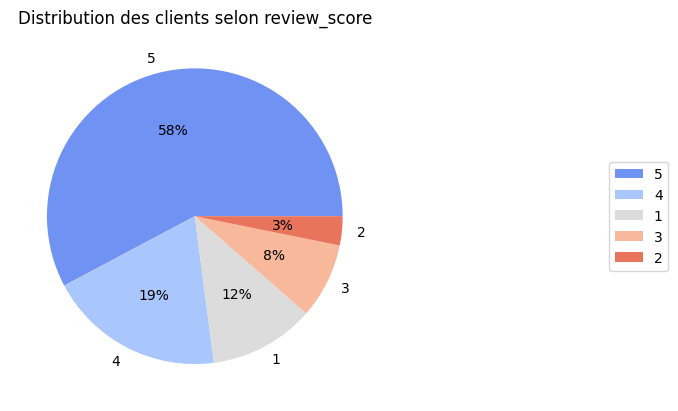

In [11]:
display(df_reviews.head(2))
print(df_reviews.info())
plot_pie_threshold(df_reviews, "review_score")

In [12]:
display(df_products.head(2))
print(df_products.info())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [13]:
df_sellers.seller_state = df_sellers.seller_state.map(dict_categories)
display(df_sellers.head(2))
print(df_sellers.info())

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,São Paulo
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,São Paulo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


In [14]:
display(df_category.head(2))
print(df_category.info())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


In [15]:
def merge_data():
    df_merged = pd.merge(df_customers, df_orders, on="customer_id")
    df_merged = pd.merge(df_merged, df_order_items, on="order_id")
    df_merged = pd.merge(df_merged, df_order_payments, on="order_id")
    df_merged = pd.merge(df_merged, df_reviews, on="order_id")
    df_merged = pd.merge(df_merged, df_products, on="product_id")
    df_merged = pd.merge(
        df_merged,
        df_geoloc.rename(
            columns={"geolocation_zip_code_prefix": "customer_zip_code_prefix"}
        ),
        on="customer_zip_code_prefix",
    )
    return df_merged

In [16]:
df_merged = merge_data()

(-101.46676644931476,
 -6.898559051071016,
 -34.586422110664884,
 42.18400274298598)

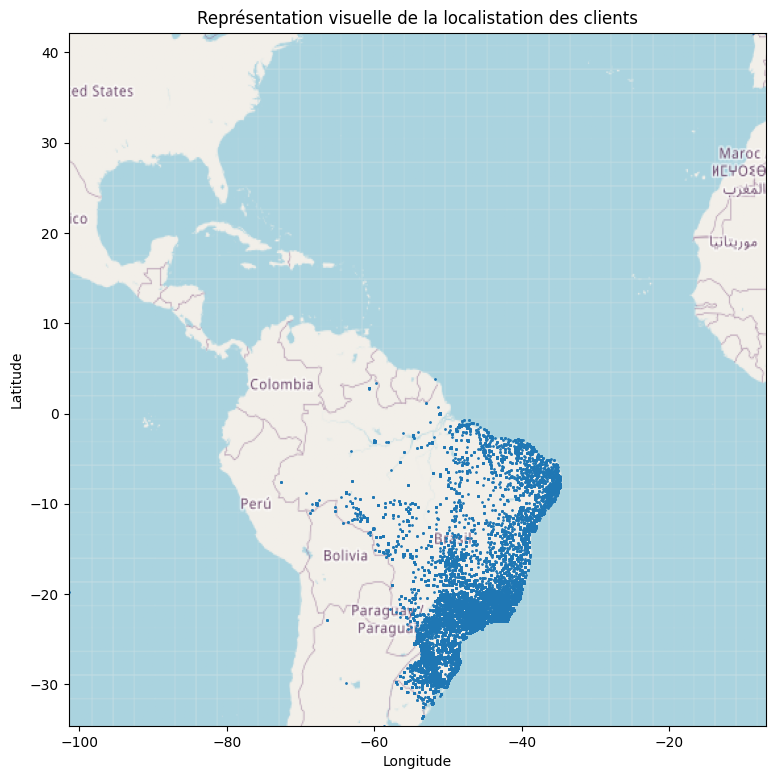

In [18]:
geoloc_customers = df_merged.groupby("customer_unique_id").agg(
    {
        "geolocation_lat": lambda x: x.mode().iat[0],
        "geolocation_lng": lambda x: x.mode().iat[0],
    }
)
carte = geoloc_customers.rename(
    columns={"geolocation_lat": "latitude", "geolocation_lng": "longitude"}
)
BBox = (
    carte.longitude.min(),
    carte.longitude.max(),
    carte.latitude.min(),
    carte.latitude.max(),
)
display(BBox)

map_ = plt.imread("map.png")  # image récupéré sur https://www.openstreetmap.org/

fig, ax = plt.subplots(figsize=(9, 9))
ax.scatter(carte.longitude, carte.latitude, s=1)
ax.set_title("Représentation visuelle de la localistation des clients")
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.imshow(map_, extent=BBox, aspect="auto")

### product_category_name

#### Traduction product_category_name

In [19]:
df_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [20]:
# Fusionner les deux dataframes sur la colonne "product_category_name"
df_merged = df_merged.merge(df_category, on="product_category_name", how="left")
# Supprimer la colonne "product_category_name" du dataframe résultant, ainsi que les doublons
df_merged = df_merged.drop(columns=["product_category_name"]).drop_duplicates()
df_merged.rename(
    columns={"product_category_name_english": "product_category_name"}, inplace=True
)

In [21]:
df_merged["product_category_name"].value_counts()

product_category_name
bed_bath_table                             1284248
health_beauty                               986368
furniture_decor                             953963
sports_leisure                              940022
computers_accessories                       858109
housewares                                  794429
watches_gifts                               609223
garden_tools                                490288
toys                                        447941
telephony                                   439788
auto                                        430885
cool_stuff                                  408288
perfumery                                   366741
baby                                        337476
electronics                                 300627
stationery                                  274012
pet_shop                                    234624
fashion_bags_accessories                    217745
office_furniture                            182256
luggage_a

In [22]:
df_merged.to_pickle("merged_data.pkl")

#### Réencodage des modalités similaires de product_category

In [23]:
dict_categories = {
    # Home
    "furniture_living_room": "home",
    "furniture_mattress_and_upholstery": "home",
    "furniture_bedroom": "home",
    "furniture_decor": "home",
    "bed_bath_table": "home",
    "kitchen_dining_laundry_garden_furniture": "home",
    "la_cuisine": "home",
    "home_confort": "home",
    "home_comfort_2": "home",
    "garden_tools": "home",
    "flowers": "home",
    # Appliances
    "small_appliances": "appliances",
    "small_appliances_home_oven_and_coffee": "appliances",
    "home_appliances_2": "appliances",
    "home_appliances": "appliances",
    "housewares": "appliances",
    # Electronics
    "telephony": "electronics",
    "electronics": "electronics",
    "computers_accessories": "electronics",
    "consoles_games": "electronics",
    "fixed_telephony": "electronics",
    "audio": "electronics",
    "computers": "electronics",
    "tablets_printing_image": "electronics",
    # food_drinks
    "food_drink": "food_drinks",
    "food": "food_drinks",
    "drinks": "food_drinks",
    # construction
    "construction_tools_construction": "construction",
    "costruction_tools_garden": "construction",
    "costruction_tools_tools": "construction",
    "construction_tools_safety": "construction",
    "construction_tools_lights": "construction",
    "home_construction": "construction",
    "air_conditioning": "construction",
    # office
    "office_furniture": "office",
    "industry_commerce_and_business": "office",
    "stationery": "office",
    "agro_industry_and_commerce": "office",
    "signaling_and_security": "office",
    "furnitures": "office",
    "security_and_services": "office",
    # Sports
    "sports_leisure": "sports",
    # Pets
    "pet_shop": "pet_shop",
    # Automobile
    "auto": "automobile",
    # arts
    "musical_instruments": "arts",
    "art": "arts",
    "cine_photo": "arts",
    "cds_dvds_musicals": "arts",
    "music": "arts",
    "dvds_blu_ray": "arts",
    "arts_and_craftmanship": "arts",
    # Books
    "books_imported": "books",
    "books_general_interest": "books",
    "books_technical": "books",
    # fashion
    "watches_gifts": "fashion",
    "fashion_bags_accessories": "fashion",
    "fashion_underwear_beach": "fashion",
    "fashion_shoes": "fashion",
    "fashion_male_clothing": "fashion",
    "fashio_female_clothing": "fashion",
    "fashion_sport": "fashion",
    "fashion_childrens_clothes": "fashion",
    # health_beauty
    "health_beauty": "health_beauty",
    "baby": "health_beauty",
    "diapers_and_hygiene": "health_beauty",
    "perfumery": "health_beauty",
    # Celebrations
    "christmas_supplies": "celebrations_supplies",
    "party_supplies": "celebrations_supplies",
    # Miscellaneous
    "luggage_accessories": "miscellaneous",
    "Unknown": "miscellaneous",
    "market_place": "miscellaneous",
    "cool_stuff": "miscellaneous",
}

In [24]:
df_merged["product_category_name"] = df_merged["product_category_name"].map(
    dict_categories
)

In [25]:
df_merged["product_category_name"].value_counts()

product_category_name
home                     2900307
electronics              1810784
health_beauty            1694736
appliances                990900
sports                    940022
fashion                   896205
miscellaneous             575437
office                    530688
automobile                430885
construction              291454
pet_shop                  234624
arts                      116358
food_drinks               115232
books                      93590
celebrations_supplies      18984
Name: count, dtype: int64

Un client peut il avoir commandé plusieurs fois à des dates différentes ?  
En terme technique, un customer_id peut il avoir plusieurs order_id non similaires associés ?

In [26]:
print(
    f"Il existe {(df_merged.groupby('customer_unique_id')['order_id'].nunique() > 1 ).sum()} clients qui ont effectués plus d'une commande"
)

Il existe 2860 clients qui ont effectués plus d'une commande


In [27]:
print(
    f"Les dates d'achats sont comprises entre le {df_merged.order_purchase_timestamp.min()} et le {df_merged.order_purchase_timestamp.max()}"
)

Les dates d'achats sont comprises entre le 2016-09-04 21:15:19 et le 2018-09-03 09:06:57


Nous définissons la date de référence pour calculer la récence, qui est le lendemain de la date de l'achat le plus récent.

In [28]:
now = pd.Timestamp("2018-09-04 09:06:57")
df_merged["order_purchase_timestamp"] = pd.to_datetime(
    df_merged["order_purchase_timestamp"]
)
df_merged["recency"] = (now - df_merged["order_purchase_timestamp"]).dt.days
rfmTable = df_merged.groupby("customer_unique_id").agg(
    {
        "recency": lambda x: x.min(),
        "order_id": lambda x: x.nunique(),
        "payment_value": lambda x: x.sum(),
    }
)

rfmTable.rename(
    columns={"order_id": "frequency", "payment_value": "monetary_value"}, inplace=True
)

- 'recency': lambda x:x.min(): Cette fonction calcule la valeur minimale de la colonne recency, qui représente la récence pour chaque client. Cela nous donne le nombre de jours écoulés depuis la dernière commande pour chaque client.  
- 'order_id': lambda x: x.nunique(): Cette fonction calcule le nombre de commandes pour chaque client, ce qui représente la fréquence.  
- 'payment_value': lambda x: x.sum(): Cette fonction calcule le montant total dépensé par chaque client, ce qui représente la valeur monétaire.  
- 'review_score': lambda x: x.mean(): Cette fonction calcule la moyenne des reviews du client sur toutes ses commandes.  
- 'product_category_name': lambda x: x.mode() : Cette fonction nous donne la categorie de produit la plus souvent commandé par le client.

In [29]:
rfm = rfmTable.copy()

In [30]:
rfm.frequency.value_counts()

frequency
1     91597
2      2627
3       185
4        29
5         9
6         5
7         3
9         1
16        1
Name: count, dtype: int64

In [31]:
rfmTable

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,7236.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,1631.40
0000f46a3911fa3c0805444483337064,542,1,6725.16
0000f6ccb0745a6a4b88665a16c9f078,326,1,1221.36
0004aac84e0df4da2b147fca70cf8255,293,1,20082.78
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452,1,33078.72
fffea47cd6d3cc0a88bd621562a9d061,267,1,4651.90
ffff371b4d645b6ecea244b27531430a,573,1,5847.92


In [32]:
quantiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])
quantiles
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()
##  RFM Segmentation ----
RFM_Segment = rfmTable.copy()


# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


RFM_Segment["R_Quartile"] = RFM_Segment["recency"].apply(
    R_Class,
    args=(
        "recency",
        quantiles,
    ),
)
RFM_Segment["F_Quartile"] = RFM_Segment["frequency"].apply(
    FM_Class,
    args=(
        "frequency",
        quantiles,
    ),
)
RFM_Segment["M_Quartile"] = RFM_Segment["monetary_value"].apply(
    FM_Class,
    args=(
        "monetary_value",
        quantiles,
    ),
)
RFM_Segment["RFMClass"] = (
    RFM_Segment.R_Quartile.map(str)
    + RFM_Segment.F_Quartile.map(str)
    + RFM_Segment.M_Quartile.map(str)
)

In [33]:
rfm = RFM_Segment.copy()

In [34]:
rfm

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,7236.90,4,1,2,412
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,1631.40,4,1,1,411
0000f46a3911fa3c0805444483337064,542,1,6725.16,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,326,1,1221.36,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,293,1,20082.78,2,1,4,214
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452,1,33078.72,1,1,4,114
fffea47cd6d3cc0a88bd621562a9d061,267,1,4651.90,2,1,2,212
ffff371b4d645b6ecea244b27531430a,573,1,5847.92,1,1,2,112


Text(0.5, 1.0, "Distribution des quantiles de la récence d'achat")

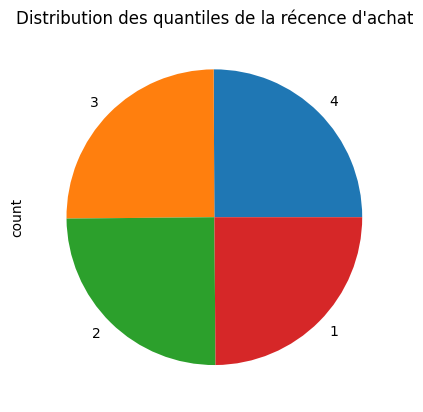

In [35]:
rfm["R_Quartile"].value_counts().plot.pie()
plt.title("Distribution des quantiles de la récence d'achat")

Text(0.5, 1.0, "Distribution des quantiles de la fréquence d'achat")

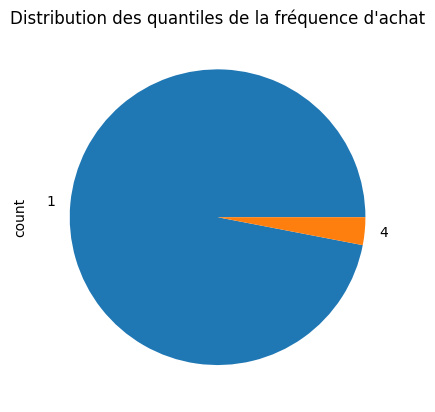

In [36]:
rfm["F_Quartile"].value_counts().plot.pie()
plt.title("Distribution des quantiles de la fréquence d'achat")

Text(0.5, 1.0, "Distribution des quantiles du Montant d'achat")

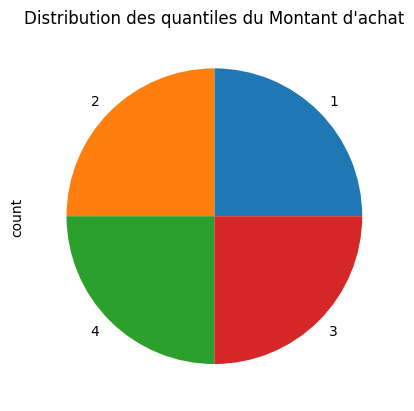

In [37]:
rfm["M_Quartile"].value_counts().plot.pie()
plt.title("Distribution des quantiles du Montant d'achat")

In [38]:
# rfm.drop(['R_Quartile', 'F', 'M'], axis=1, inplace=True)

In [39]:
data = rfm.copy()

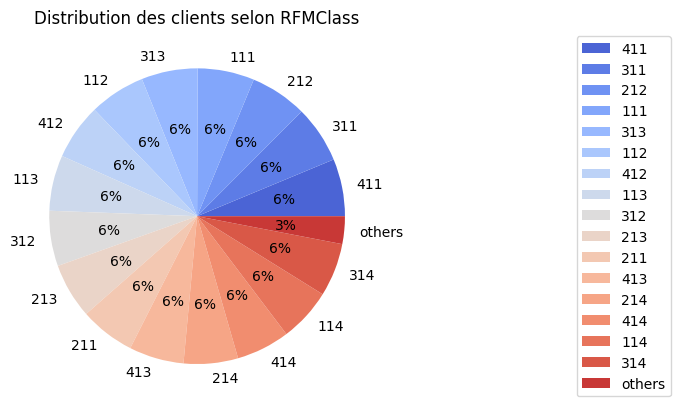

In [40]:
plot_pie_threshold(rfm, "RFMClass", 1)

In [41]:
data = pd.DataFrame(data)
data.reset_index(inplace=True)

In [42]:
data["RFMClass"].unique()

array(['412', '411', '112', '211', '214', '312', '311', '314', '111',
       '213', '113', '414', '114', '212', '413', '313', '244', '444',
       '341', '143', '343', '344', '443', '243', '144', '342', '141',
       '242', '442', '441', '142', '241'], dtype=object)

### Aspect métier de la segmentation :

- **Les clients VIP** : A acheté récemment, achète souvent et, en général, pour des montants supérieurs à la moyenne.  
Actions recommandés : Lui accorder des privilèges auxquels les autres clients n’ont pas accès, le récompenser (ventes privées, codes promos, invitations à des événements), lui demander des noms de proches qui pourraient être intéressés par la marque.  
Segment correspondant : 444  

- **Les clients fidèles** : A acheté récemment, achète régulièrement et pour un montant assez élevé.  
Actions recommandés : Lui proposer des codes promos, organiser des campagnes d’up-sell, récolter des feedbacks auprès de lui (laisser un avis), le remercier directement.  
Segment correspondant : 443, 433, 434, 344, 343, 333  

- **Les clients à fort potentiel** : Ils n'ont pas effectué d'achats récemment, ont acheté avec une fréquence moyenne ou faible et ont dépensé un montant moyen ou élevé.  
Actions recommandés : Lui donner des conseils, lui apporter de la plus-value, organiser des campagnes de cross-sell, lui faire découvrir davantage les services/produits, lui envoyer des avis de clients satisfaits.    
Segment correspondant : 113, 114, 123, 124

- **Les clients à risque** : n’a pas acheté récemment mais avait pour habitude d’acheter souvent et pour des montants élevés.  
Actions recommandés : Organiser des campagnes de relance (“vous nous manquez”), lui proposer des promotions rapides et à durée de vie limitée, miser sur la personnalisation, lui envoyer des ressources utiles.  
Segment correspondant : 144, 143, 134, 133, 

- **Les clients perdu** : n’a pas acheté récemment, n’achetait pas souvent et pour un montant dans la moyenne ou en-dessous.  
Actions recommandés : Tenter la réactivation à travers une seule campagne pour susciter son intérêt et, s’il ne répond pas, abandonner.  
Segment correspondant : 111, 112

In [43]:
# Calcul des effectifs pour chaque type de client
effectif_vip = ((data['RFMClass']=='444')).sum()
effectif_reguliers = ((data['RFMClass']=='344') | (data['RFMClass']=='343')| (data['RFMClass']=='443')| (data['RFMClass']=='433')| (data['RFMClass']=='434') | (data['RFMClass']=='333')).sum()
effectif_fort_potentiel = ((data['RFMClass']=='113') | (data['RFMClass']=='114')| (data['RFMClass']=='123')| (data['RFMClass']=='124')).sum()
effectif_a_risque = ((data['RFMClass']=='144') | (data['RFMClass']=='143') | (data['RFMClass']=='134') | (data['RFMClass']=='133')).sum()
effectif_perdu = ((data['RFMClass']=='111') | (data['RFMClass']=='112')).sum()

# Création du DataFrame
df_type_client = pd.DataFrame(
    {
        "type": ["VIP", "Réguliers", "Fort potentiel", "A risque", "Perdu"],
        "effectif": [
            effectif_vip,
            effectif_reguliers,
            effectif_fort_potentiel,
            effectif_a_risque,
            effectif_perdu
        ],
    }
)

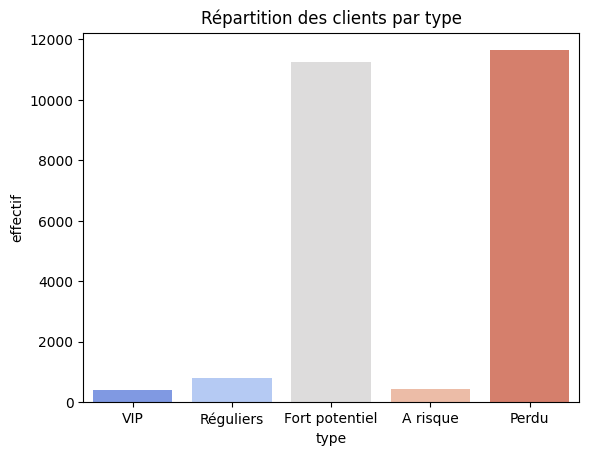

In [44]:
colors = sns.color_palette("coolwarm", n_colors=df_type_client.type.nunique())
sns.barplot(x="type", y="effectif", data=df_type_client, palette=colors)
plt.title("Répartition des clients par type")
plt.show()

In [45]:
var_to_merge = df_merged.groupby("customer_unique_id").agg(
    {"review_score": lambda x: x.mean(), "product_category_name": lambda x: x.mode()}
)
var_to_merge.rename(
    columns={
        "review_score": "mean_review_score",
        "product_category_name": "most_purchased_category",
    },
    inplace=True,
)
var_to_merge["most_purchased_category"] = var_to_merge["most_purchased_category"].apply(
    lambda x: x if len(x) > 0 else "no details"
)

In [46]:
df_merged = data.merge(var_to_merge, how="left", on="customer_unique_id")

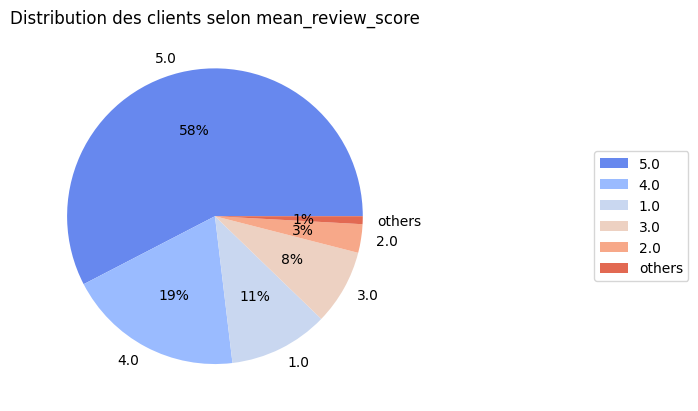

In [47]:
plot_pie_threshold(df_merged, "mean_review_score", 1)

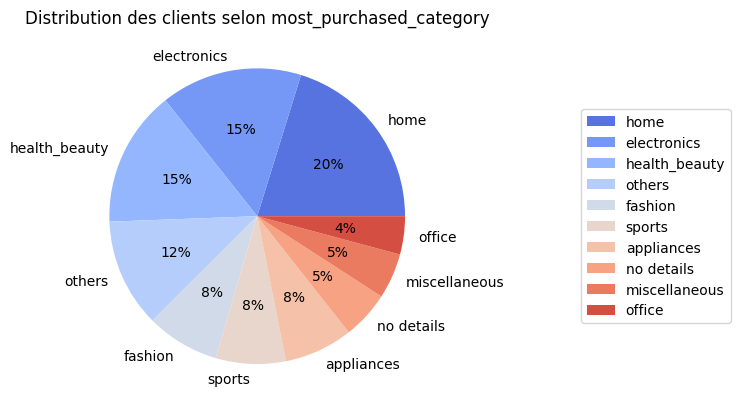

In [48]:
df_merged["most_purchased_category"] = df_merged["most_purchased_category"].astype(str)
plot_pie_threshold(df_merged, "most_purchased_category", 4)

### PCA

In [49]:
pca_df = df_merged.copy()

In [50]:
most_purchased_category = pca_df["most_purchased_category"]
pca_df.drop(
    [
        "most_purchased_category",
        "R_Quartile",
        "F_Quartile",
        "M_Quartile",
        "RFMClass",
        "mean_review_score",
    ],
    axis=1,
    inplace=True,
)
pca_df.set_index("customer_unique_id", inplace=True)

In [51]:
pca_df

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,7236.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,1631.40
0000f46a3911fa3c0805444483337064,542,1,6725.16
0000f6ccb0745a6a4b88665a16c9f078,326,1,1221.36
0004aac84e0df4da2b147fca70cf8255,293,1,20082.78
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452,1,33078.72
fffea47cd6d3cc0a88bd621562a9d061,267,1,4651.90
ffff371b4d645b6ecea244b27531430a,573,1,5847.92


In [52]:
names = pca_df.index
features = pca_df.columns

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_df)

In [54]:
n_components = pca_df.shape[1]
pca = PCA(n_components=n_components)
pca.fit(X_scaled)
pca.explained_variance_ratio_

array([0.35677086, 0.33322797, 0.31000117])

In [55]:
scree = (pca.explained_variance_ratio_ * 100).round(2)
scree_cum = scree.cumsum().round()
scree_cum

array([ 36.,  69., 100.])

In [56]:
x_list = range(1, n_components + 1)
list(x_list)

[1, 2, 3]

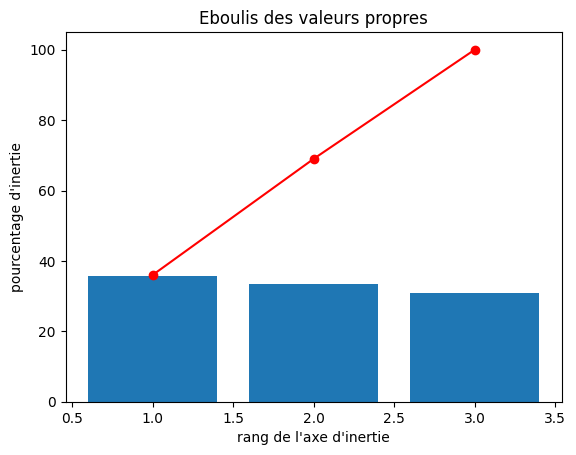

In [57]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum, c="red", marker="o")
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

<Axes: >

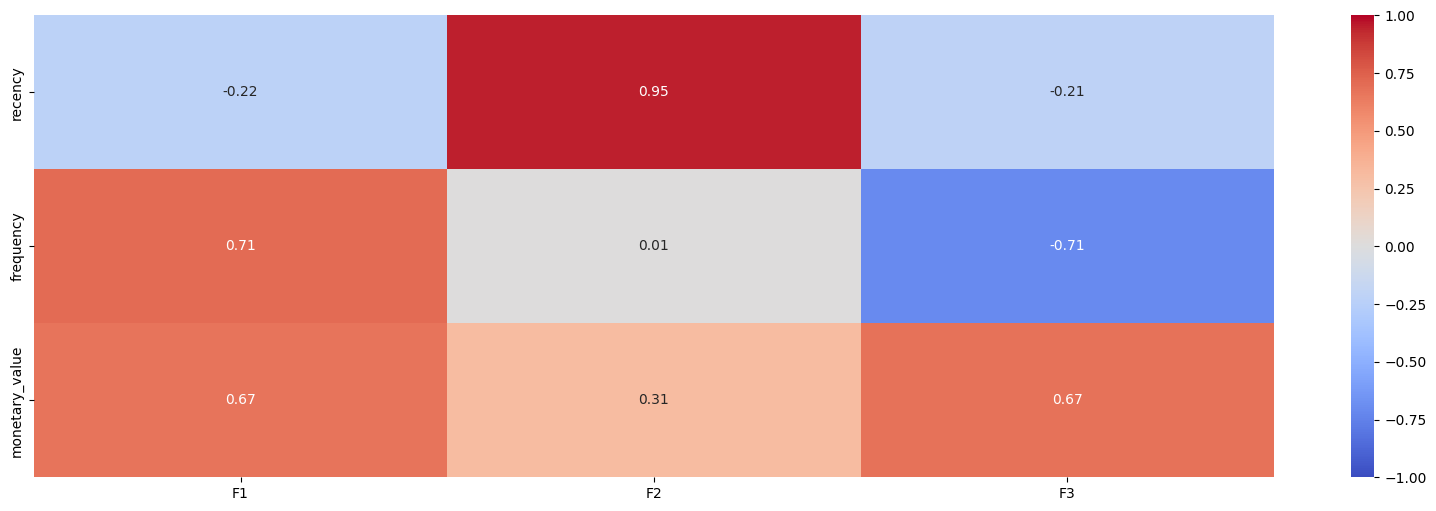

In [58]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)
pcs.T
plt.figure(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

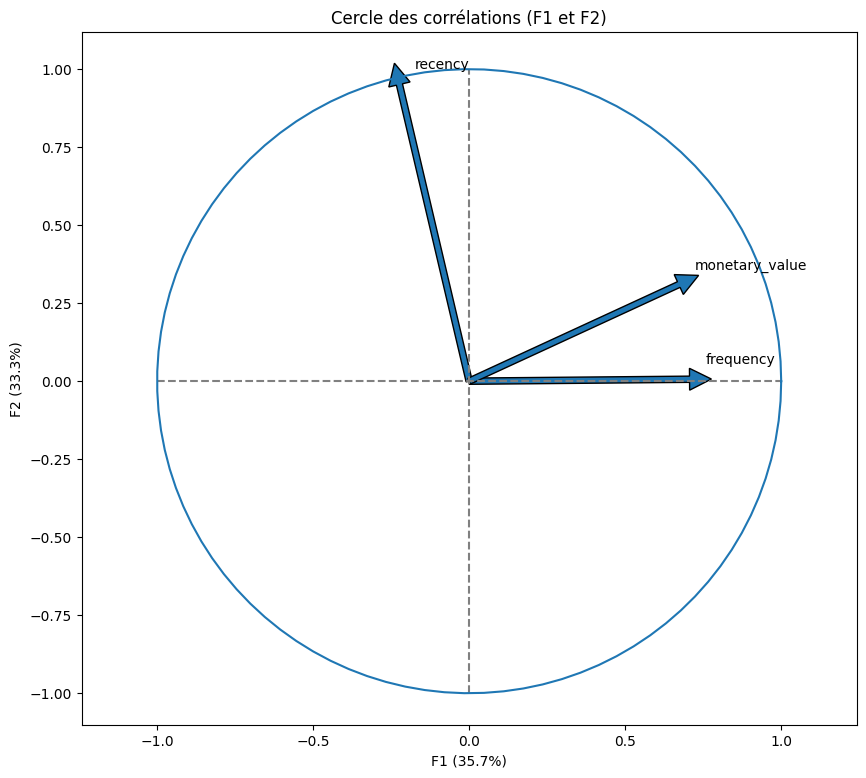

In [59]:
x_y = (0, 1)
correlation_graph(pca, x_y, features)

C:\Users\aurel\Documents\Master\Segmentez des clients d'un site e-commerce\data_analysis_library.py:116: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_[:, x],


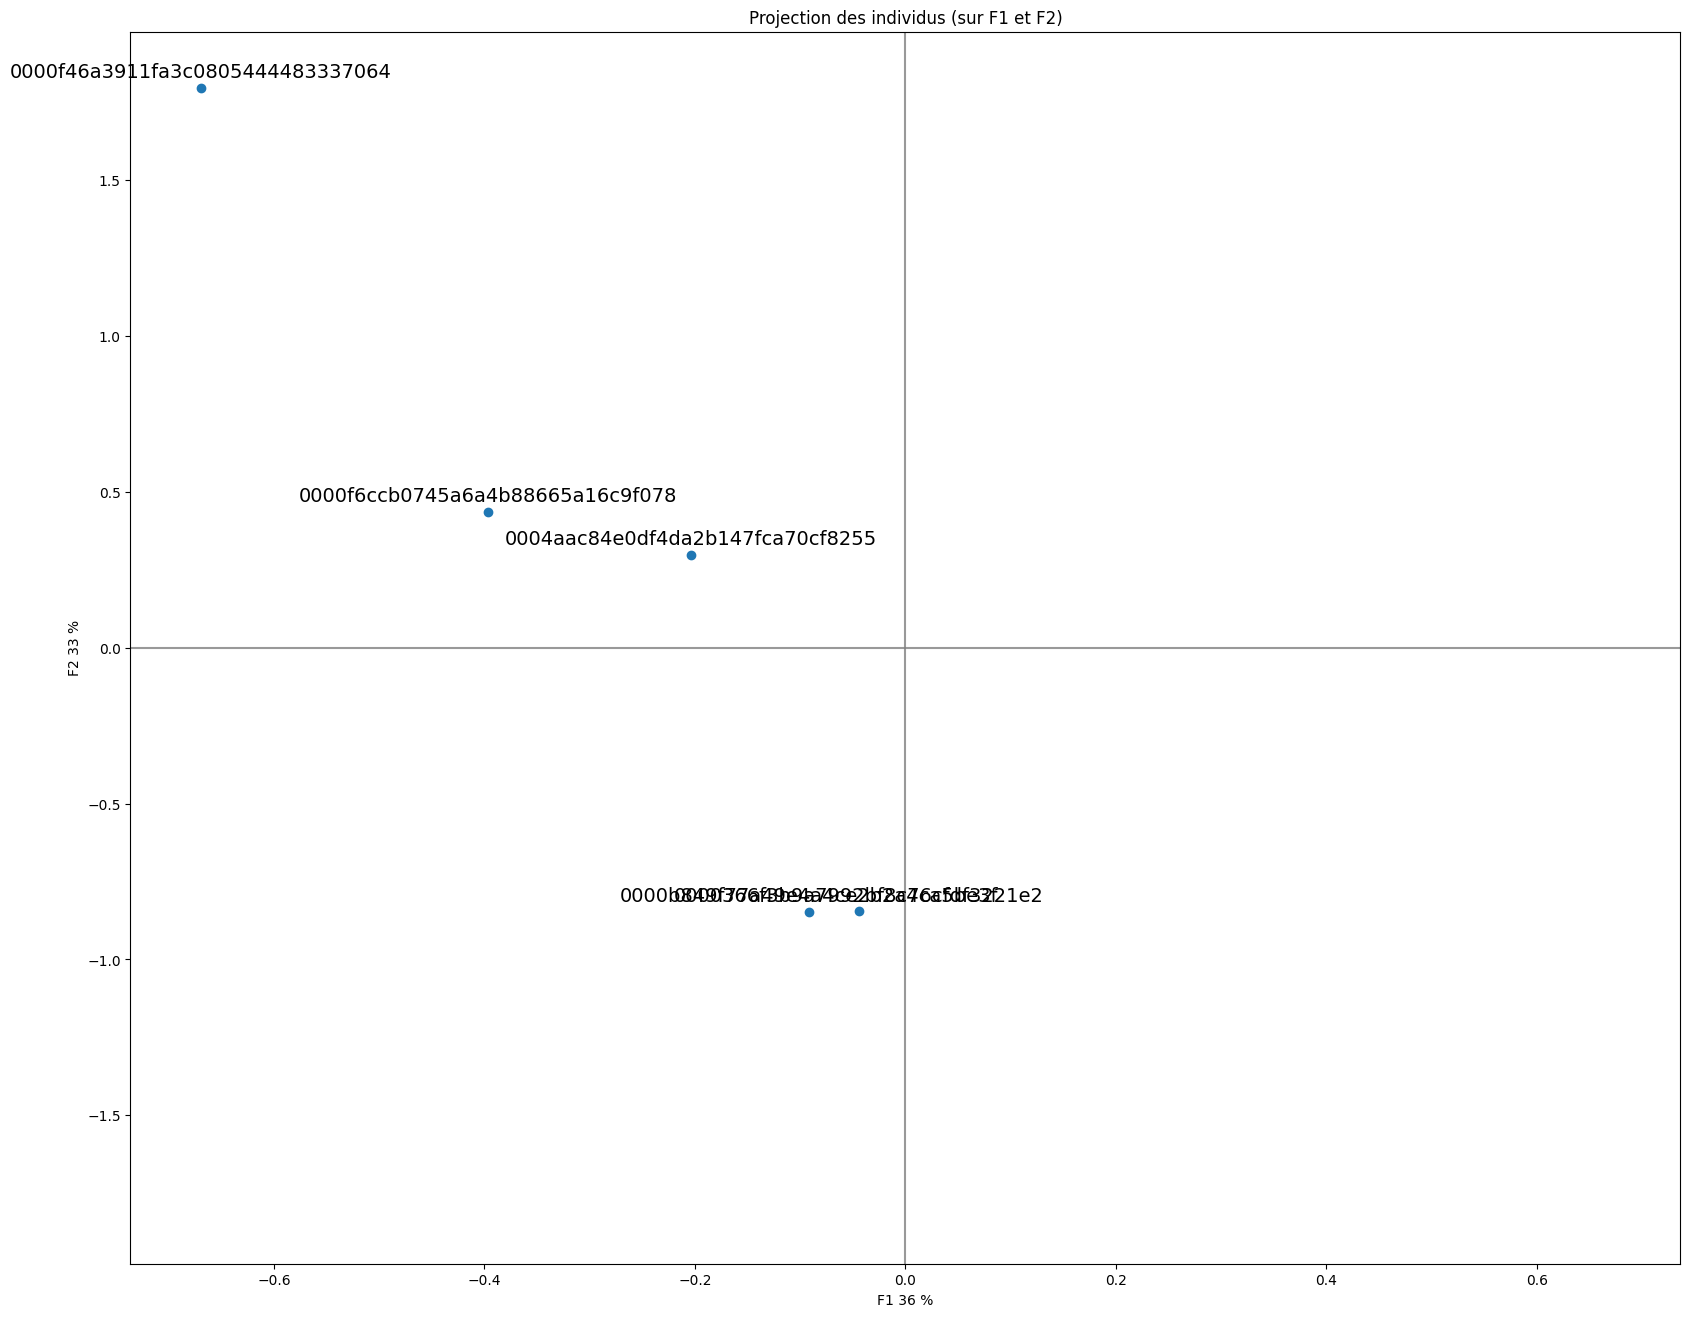

In [60]:
x_y = [0, 1]
X_proj = pca.transform(X_scaled)
display_factorial_planes(
    X_proj[:5], x_y, pca, labels=names, figsize=(20, 16), marker="o"
)

In [61]:
df_merged = df_merged.drop(
    ["R_Quartile", "F_Quartile", "M_Quartile", "RFMClass", "most_purchased_category"],
    axis=1,
)

In [62]:
df_merged.to_pickle("rfm_data.pkl")